## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

In [2]:
import pyforest

In [3]:
#Initialize the random number generator
import random
random.seed(0)

#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Lets load the MNIST dataset

In [5]:
from keras.datasets import mnist

In [6]:
#the data, shuffled and split between train and test sets
(xtr, ytr), (xte,yte) = mnist.load_data()

In [7]:
xtr.shape

(60000, 28, 28)

In [8]:
xte.shape

(10000, 28, 28)

In [9]:
ytr.shape

(60000,)

In [10]:
yte.shape

(10000,)

x_train and x_test contain greyscale RGB data (from 0 to 255) while y_train and Y_test contains labels from 0 to 9 which represents which number they actually are.

Lets visualize some using matplotlib

Label: 5


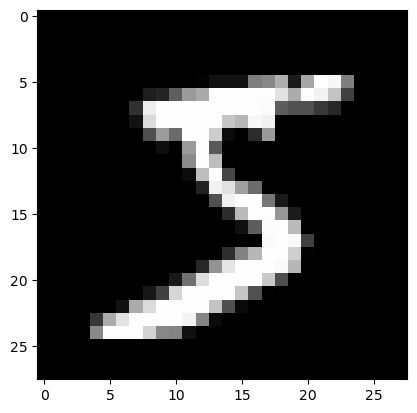

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(ytr[0]))
plt.imshow(xtr[0], cmap = 'grey')

## Reshape train and test sets into compatible shapes

1. Sequential model in tensorflow.kerasexpects data to be in the format (n_e_n_h_n_w_n_c)
2. n_e = number of examples, n_h = height, n_w = width, n_c = number of channels
3. do not reshape labelshape labels

In [14]:
xtr = xtr.reshape(xtr.shape[0],28,28,1)
xte = xte.reshape(xte.shape[0],28,28,1)

In [15]:
xtr[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [16]:
xte[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

## Normalize the data

- We must normalize the data in network models
- Normalize xtr and xte
- Convert the values to float

In [18]:
xtr = xtr.astype('float')
xte = xte.astype('float')
xtr /=255 ## Same as, xtr = xtr/255
xte /=255

In [19]:
print('xtrain shape:', xtr.shape)
print('xtest shape:', xte.shape)
print('images in xtr:', xtr.shape[0])
print('images in xte:', xte.shape[0])
print('min value in xtr:', xtr.min())
print('max value in xtr:', xtr.max())
print('min value in xte:', xte.min())
print('max value in xte:', xte.max())

xtrain shape: (60000, 28, 28, 1)
xtest shape: (10000, 28, 28, 1)
images in xtr: 60000
images in xte: 10000
min value in xtr: 0.0
max value in xtr: 1.0
min value in xte: 0.0
max value in xte: 1.0


In [20]:
from keras.utils import to_categorical

In [21]:
ytr = to_categorical(ytr,num_classes=10)
yte = to_categorical(yte,num_classes=10)

In [22]:
ytr.shape

(60000, 10)

In [23]:
yte.shape

(10000, 10)

## Initialize a Sequential model
- Initialize a sequential model
-  flatten the data
  - Add the flatten layer
  - flatten layers flattens 2D arrays to 1D array before building the fully connected layers
- Add 2 dense layers
   - Number of neurons in first layer: 128
   - Number of layers in last layer: number of classes
   - activation function in first layer: relu
   - activation function in last layer: softmax
   - we may experiment with number of neurons in first layer, but the number of neurons in last layer must have number of neurons = number of output classes 

In [25]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [26]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))

## Compiile ad Fit the model

- compile model1
  -loss: "categorical_crossentropy"
  metrics: "accuracy"
  optimizer: "sgd"
- then next step will be to fit model
  - give train data - training features and labels
  - batch size:32
  - epochs: 10
  - give validation data - testing features and labels

In [28]:
#Compile the model
model1.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'], optimizer = 'sgd')

#fit the model
history = model1.fit(x = xtr, y = ytr, batch_size = 32, epochs = 20, validation_data = (xte,yte))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7030 - loss: 1.0756 - val_accuracy: 0.9131 - val_loss: 0.3132
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9091 - loss: 0.3116 - val_accuracy: 0.9239 - val_loss: 0.2613
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9285 - loss: 0.2514 - val_accuracy: 0.9392 - val_loss: 0.2131
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9398 - loss: 0.2082 - val_accuracy: 0.9460 - val_loss: 0.1835
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9471 - loss: 0.1841 - val_accuracy: 0.9517 - val_loss: 0.1642
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9535 - loss: 0.1609 - val_accuracy: 0.9550 - val_loss: 0.1500
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9583 - loss: 0.1469 - val_accuracy: 0.9591 - val_loss: 0.1369
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9621 - loss: 0.1323 - 

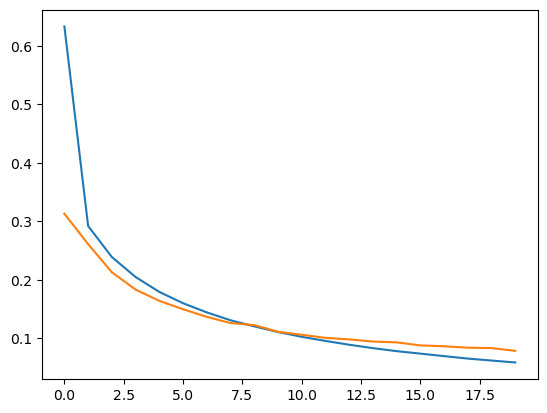

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [30]:
model1.evaluate(xte,yte)

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential, built=True>>

In [57]:
yprob = model1.predict(xte)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
ypred = np.argmax(yprob,axis = 1)
ypred

<IPython.core.display.Javascript object>

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

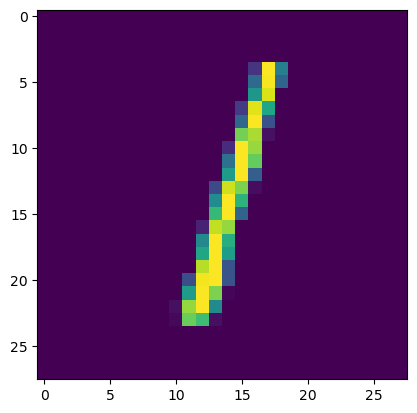

In [73]:
plt.imshow(xte[2])

In [71]:
ypred1 = to_categorical(ypred,num_classes = 10)

In [75]:
metrics.accuracy_score(yte,ypred1)

<IPython.core.display.Javascript object>

0.975

In [77]:
keras.backend.clear_session()

<IPython.core.display.Javascript object>